### Author: Sridharan Chandran

# PROJECT : SUPERVISED LEARNING

## Part - A

**DOMAIN:** Medical

**• CONTEXT:** Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

**• DATA DESCRIPTION:** The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

**• PROJECT OBJECTIVE:** To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

### • STEPS AND TASK:

### 1. Data Understanding:

#### A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. 

In [1]:
# Lets import some necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
# Import all 3 dataset & storing into variable names.
Normal = pd.read_csv("Normal.csv")
Type_H = pd.read_csv("Type_H.csv")
Type_S = pd.read_csv("Type_S.csv")

In [3]:
Normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
Type_H.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [5]:
Type_S.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


#### B. Print Shape and columns of all the 3 DataFrames

In [6]:
print("Normal dataframe has {} Rows & {} Columns".format(Normal.shape[0],Normal.shape[1]))
print("Normal dataframe columns name:",list(Normal.columns))

Normal dataframe has 100 Rows & 7 Columns
Normal dataframe columns name: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']


In [7]:
print("Type_H data set has {} Rows & {} Columns".format(Type_H.shape[0],Type_H.shape[1]))
print("Type_H dataframe columns name:",list(Type_H.columns))

Type_H data set has 60 Rows & 7 Columns
Type_H dataframe columns name: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']


In [8]:
print("Type_S data set has {} Rows & {} Columns".format(Type_S.shape[0],Type_S.shape[1]))
print("Type_H dataframe columns name:",list(Type_H.columns))

Type_S data set has 150 Rows & 7 Columns
Type_H dataframe columns name: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']


#### C. Compare Column names of all the 3 DataFrames and clearly write observations. 

* P_incidence - pelvic incidence
* P_tilt - pelvic tilt
* L_angle - lumbar lordosis angle
* S_slope - sacral slope
* P_radius - pelvic radius
* S_Degree - grade of spondylolisthesis
* Normal - Normal patients
* Type_S - Spondylolisthesis patients
* Type_H - Herniated disk patients

In [9]:
# Lets check the 3 dataframe columns names are equal or not.
print(Normal.columns.equals(Type_H.columns))
print(Normal.columns.equals(Type_S.columns))

True
True


Normal dataframe columns names are equal to Type_H dataframe columns & Normal dataframe columns names are equal to Type_S dataframe columns. 

Which means all 3 dataframe columns names are equals to each other.

Normal.columns = Type_H.columns = Type_S.columns

#### D. Print DataTypes of all the 3 DataFrames.

In [10]:
Normal.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [11]:
Type_H.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [12]:
Type_S.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

All three dataframes independent columns data type is (float64) except dependent "Class" column which is "object" datatype.

#### E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.

In [13]:
Normal.groupby(by=["Class"])["Class"].count()

Class
Normal    73
Nrmal     27
Name: Class, dtype: int64

In [14]:
# There are two variables in Class attribute (Normal & Nrmal)

In [15]:
Type_H.groupby(by=["Class"])["Class"].count()

Class
Type_H    37
type_h    23
Name: Class, dtype: int64

In [16]:
# There are two variables in Class attribute (Type_H & type_h)

In [17]:
Type_S.groupby(by=["Class"])["Class"].count()

Class
Type_S    133
tp_s       17
Name: Class, dtype: int64

In [18]:
# There are two variables in Class attribute (Type_S & Type_S)

### 2. Data Preparation and Exploration:

#### A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [19]:
Normal["Class"].replace({'Nrmal':'Normal'},inplace=True)
# Replace the variables 'Nrmal'to'Normal'.

In [20]:
Type_H["Class"] = np.where(Type_H["Class"] != "Type_h", "Type_h", Type_H["Class"])
# Replace all class column variables to "Type_h".

In [21]:
Type_S["Class"] = np.where(Type_S["Class"] != "type_s", "type_s", Type_S["Class"])
# Replace all class column variables to "type_s".

#### B. Combine all the 3 DataFrames to form a single DataFrame 

In [22]:
df = [Normal, Type_H, Type_S] # Store all 3 dataframes into 1 variable.

In [23]:
df = pd.concat(df,ignore_index=True) # Concating all 3 dataframes into 1 variable.

In [24]:
df.shape

(310, 7)

In [25]:
df["Class"].value_counts(normalize = True) # normalize = True is percentage of data distributed in feature.

type_s    0.483871
Normal    0.322581
Type_h    0.193548
Name: Class, dtype: float64

#### C. Print 5 random samples of this DataFrame

In [26]:
df.sample(n=5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
75,67.804694,16.550662,43.256802,51.254033,119.685645,4.867540,Normal
49,63.619192,16.934508,49.349262,46.684684,117.089747,-0.357812,Normal
36,46.637864,15.853717,40.000000,30.784147,119.377603,9.064582,Normal
94,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
254,41.187770,5.792974,42.867392,35.394796,103.348880,27.660277,type_s


#### D. Print Feature-wise percentage of Null values

In [27]:
df.isnull().any()

P_incidence    False
P_tilt         False
L_angle        False
S_slope        False
P_radius       False
S_Degree       False
Class          False
dtype: bool

**There is no null value in this dataframe.**

#### E. Check 5-point summary of the new DataFrame. 

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


### 3. Data Analysis:

In [29]:
# Lets make a deep copy of the dataset to do some modifications."(deep=True)"will not make any changes in original dataframe.
df1 = df.copy(deep=True) 

#### A. Visualize a heatmap to understand correlation between all features

In [30]:
df1.corr() # Correlation  of the features

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


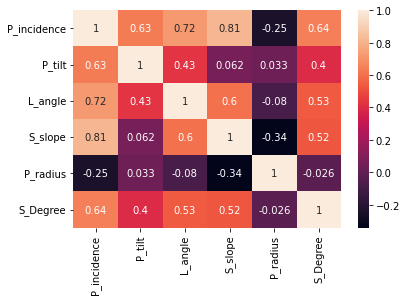

In [31]:
# Lets visuvalize the correlations of the features with Heatmap.
sns.heatmap(df1.corr(),annot=True);

#### B. Share insights on correlation

##### A. Features having stronger correlation with correlation value

*The features "P_incidence" & "S_slope" have strong positive correlation which is 0.81 (Positive 81%)*

##### B. Features having weaker correlation with correlation value

*The features "P_radius" & "S_Degree" have weaker negative correlation which is -0.026 (Negative 2.6%)*

#### C. Visualize a pairplot with 3 classes distinguished by colors and share insights.

In [32]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


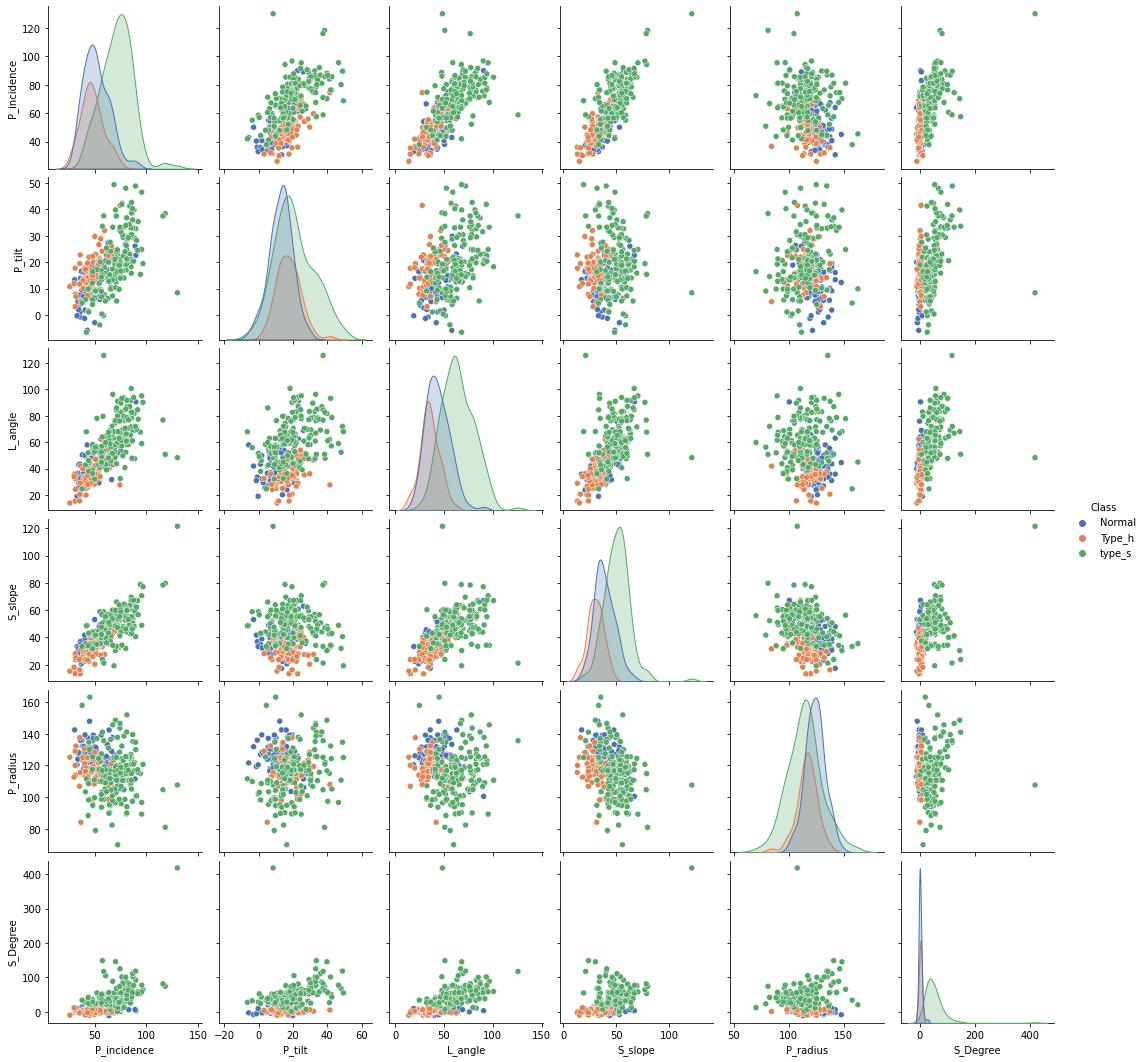

In [33]:
sns.pairplot(df1,hue="Class",palette="deep");

#### D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.

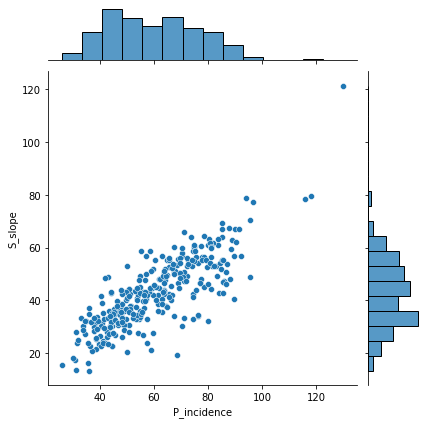

In [34]:
sns.jointplot(data=df1, x=df1["P_incidence"], y=df1["S_slope"]);

P_incidence’ and ‘S_slope’ are positively correlated. In "S_slope" most of the datapoint falls into range of "0 to 80". In "P_slope" most of the datapoint falls into range of "0 to 100". We can find some outliers at the range of above 100.

#### E. Visualize a boxplot to check distribution of the features and share insights.

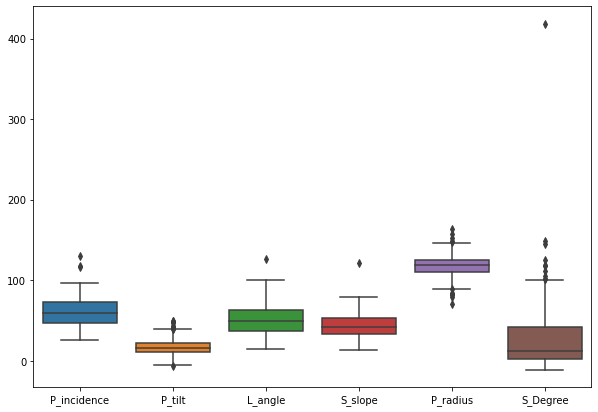

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df1);

In this box plot we can find some outilers in the all features. All features are normally skewed except "S_Degree" which is positively skewed & have a outlier data point beyond 400. These outliers will affect our model accuracy. Hence we have to preprocess the outlier values to Median value.

In [36]:
#Lets find the quartiles of the data.
Q1 = df1.quantile(.25)
Q2 = df1.median()
Q3 = df1.quantile(.75)
# Inter Quartile Range
IQR = Q3 - Q1
# Lets find the Upper & Lower bounds
Upper = Q3 + (1.5*IQR)
Lower = Q1 - (1.5*IQR)

In [37]:
# Replace all outlier values to median value.

In [38]:
df1["P_incidence"] = np.where(df1["P_incidence"]>Upper["P_incidence"], Q2["P_incidence"],df1["P_incidence"])
df1["P_incidence"] = np.where(df1["P_incidence"]>Upper["P_incidence"], Q2["P_incidence"],df1["P_incidence"])

In [39]:
df1["P_tilt"] = np.where(df1["P_tilt"]>Upper["P_tilt"], Q2["P_tilt"],df1["P_tilt"])
df1["P_tilt"] = np.where(df1["P_tilt"]<Lower["P_tilt"], Q2["P_tilt"],df1["P_tilt"])

In [40]:
df1["L_angle"] = np.where(df1["L_angle"]>Upper["L_angle"], Q2["L_angle"],df1["L_angle"])
df1["L_angle"] = np.where(df1["L_angle"]<Lower["L_angle"], Q2["L_angle"],df1["L_angle"])

In [41]:
df1["S_slope"] = np.where(df1["S_slope"]>Upper["S_slope"], Q2["S_slope"],df1["S_slope"])
df1["S_slope"] = np.where(df1["S_slope"]<Lower["S_slope"], Q2["S_slope"],df1["S_slope"])

In [42]:
df1["P_radius"] = np.where(df1["P_radius"]>Upper["P_radius"], Q2["P_radius"],df1["P_radius"])
df1["P_radius"] = np.where(df1["P_radius"]<Lower["P_radius"], Q2["P_radius"],df1["P_radius"])

In [43]:
df1["S_Degree"] = np.where(df1["S_Degree"]>Upper["S_Degree"], Q2["S_Degree"],df1["S_Degree"])
df1["S_Degree"] = np.where(df1["S_Degree"]<Lower["S_Degree"], Q2["S_Degree"],df1["S_Degree"])

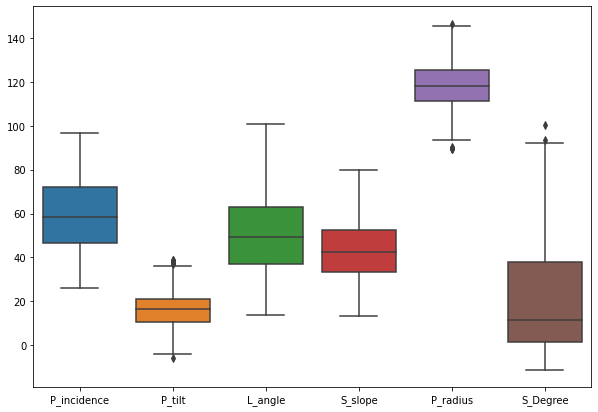

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df1);

**The above boxplot show that outliers are cleared with preprocessing technique.**

### 4. Model Building:

#### A. Split data into X and Y.

In [45]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


Lets split features of the dataframe as dependent & independent features.

In [46]:
# Lets store the indepenent features into "X" variable & Depenent features into "Y" variable
X = df1.iloc[:,:-1] 
Y = df1.iloc[:,-1]

In [47]:
print(X.head())

   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910


In [48]:
print(Y.head())

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Class, dtype: object


In [49]:
# convert the features into StandardScaler as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

XScaled = pd.DataFrame(StandardScaler().fit_transform(X))
XScaled.columns = X.columns
XScaled.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,-1.327127,0.047769,-0.918527,-1.674417,0.844417,-0.549411
1,-0.308419,0.286645,-0.004641,-0.533910,0.686678,-0.786372
2,-0.963643,-0.908011,-0.265104,-0.576279,0.984634,-0.667890
3,-0.718117,0.105914,-0.204252,-0.936380,0.963407,-0.901687
4,-0.880530,-0.703666,-0.504776,-0.605966,1.069201,-0.999796


In [50]:
XScaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,7.664120e-17,2.101478e-16,-3.491830e-16,-1.214083e-16,-2.998318e-15,2.309980e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-2.093992e+00,-2.671023e+00,-2.088709e+00,-2.321303e+00,-2.540039e+00,-1.303439e+00
25%,-8.353210e-01,-6.982347e-01,-8.139294e-01,-7.400911e-01,-5.982866e-01,-8.021263e-01
50%,-7.729063e-02,-2.453317e-02,-1.235626e-01,-2.450613e-02,1.743394e-02,-4.057354e-01
75%,7.709095e-01,5.313138e-01,6.251735e-01,7.736983e-01,6.292225e-01,6.446038e-01
max,2.281637e+00,2.644520e+00,2.719106e+00,2.927844e+00,2.507544e+00,3.105160e+00


#### B. Split data into train and test with 80:20 proportion. 

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(XScaled,Y, test_size = 0.20,random_state=42) 
# test_size = 0.2 is 20% of the data for testing.

In [53]:
y_train.count()

248

In [54]:
y_test.count()

62

#### C. Train a Supervised Learning Classification base model using KNN classifier. 

In [55]:
from sklearn.neighbors import KNeighborsClassifier # Import KNN classifier from sklearn library. 

# Create KNN classifier with 3 near neighbors.
knn = KNeighborsClassifier(n_neighbors=3, weights = 'distance')

# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [56]:
y_predict = knn.predict(X_test)
y_predict

array(['type_s', 'Type_h', 'Normal', 'Normal', 'Type_h', 'Type_h',
       'Type_h', 'type_s', 'type_s', 'Normal', 'Normal', 'type_s',
       'type_s', 'type_s', 'type_s', 'type_s', 'Normal', 'Type_h',
       'type_s', 'Normal', 'Normal', 'Type_h', 'Normal', 'type_s',
       'Normal', 'type_s', 'Type_h', 'Normal', 'type_s', 'type_s',
       'Type_h', 'Normal', 'Normal', 'type_s', 'Normal', 'Type_h',
       'type_s', 'Normal', 'type_s', 'Type_h', 'Normal', 'Type_h',
       'Normal', 'type_s', 'type_s', 'type_s', 'type_s', 'Normal',
       'type_s', 'Normal', 'Normal', 'type_s', 'Type_h', 'Normal',
       'type_s', 'type_s', 'type_s', 'type_s', 'type_s', 'type_s',
       'type_s', 'Normal'], dtype=object)

In [57]:
#check accuracy of our model on the test data
KNN_Score = knn.score(X_test, y_test)
KNN_Score

0.8225806451612904

Our test data accuracy is 0.82. We have model with 82% accuracy.

#### D. Print all the possible performance metrics for both train and test data

1. Classification Accuracy.
2. Log Loss.
3. Area Under ROC Curve.
4. Confusion Matrix.
5. Classification Report (Recall, Precision, F1-Score)

In [58]:
# Lets import the necessory packages from sklearn library.
from sklearn import metrics 

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [59]:
print ('Accuracy Score is',accuracy_score(y_predict, y_test))
print ('Recall Score is',recall_score(y_test, y_predict, average=None))
print ('Precision Score is',precision_score(y_test, y_predict, average=None))

y_predict_prob = knn.predict_proba(X_test)
print ('Log loss Score is',log_loss( y_test,y_predict_prob))
print ('roc_auc_score is',roc_auc_score(y_test, y_predict_prob,multi_class='ovr'))

Accuracy Score is 0.8225806451612904
Recall Score is [0.72727273 0.7        0.93333333]
Precision Score is [0.76190476 0.58333333 0.96551724]
Log loss Score is 0.31362790775558586
roc_auc_score is 0.9515127233877235


In [60]:
print ('Classification Report : ')
print (classification_report(y_predict, y_test))

Classification Report : 
              precision    recall  f1-score   support

      Normal       0.73      0.76      0.74        21
      Type_h       0.70      0.58      0.64        12
      type_s       0.93      0.97      0.95        29

    accuracy                           0.82        62
   macro avg       0.79      0.77      0.78        62
weighted avg       0.82      0.82      0.82        62



Confusion Matrix


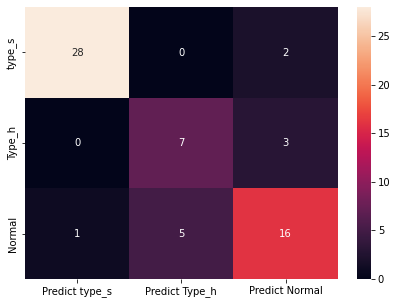

In [61]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict, labels=["type_s", "Type_h","Normal"])

df_cm = pd.DataFrame(cm, index = [i for i in ["type_s", "Type_h","Normal"]],
                  columns = [i for i in ["Predict type_s","Predict Type_h", "Predict Normal"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

**Let us calculate the TP, TN, FP, FN values for the class "type_s"**

TP = 28 The actual value and predicted value should be the same.

FN = (0 + 2) = 2  (The sum of values of corresponding rows except the TP value)

FP  = (0 + 1) = 1 (The sum of values of corresponding column except the TP value)

TN (7 + 3 + 5 + 16) =31 (The sum of values of all columns and row except the values of that class that we are calculating the values) for.


**For "Type_h" class the values/ metrics are calculated as below:**

 TP = 7
 
 FN = (0 + 3) = 3 

FP = (0 + 5) = 5

TN = (28 + 2 + 1 + 16) = 47 


**Similarly, for "Normal" class the values/ metrics are calculated as below:**
    
TP = 16

FN = (1 + 5) = 6 

FP = (2 + 3) = 5

TN = (28 + 0 + 0 + 7) = 35 


### 5. Performance Improvement:

#### A. Experiment with various parameters to improve performance of the base model. 

Build the model and train and test on training and test sets respectively using scikit-learn. Print the Accuracy of the model 
with different values of k=3,5,9.

Run the KNN with no. of neighbours to be 1,3,5..29 and find the optimal number of neighbours from the above list using the Misclassification error

In [62]:
# creating odd list of K for KNN
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [63]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn_1 = KNeighborsClassifier(n_neighbors=k, weights='distance' )
    knn_1.fit(X_train, y_train)
    # predict the response
    y_predict1 = knn_1.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_predict1)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


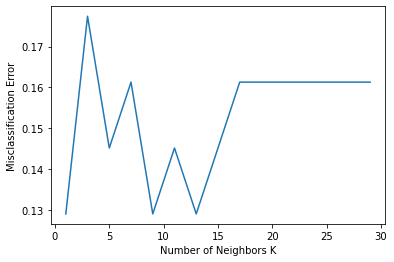

In [64]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For a very low value of k (k=1), the model overfits on the training data, which leads to a high error rate on the validation set. Hence we take second lowest value of k (k=9).

In [65]:
#Use k=9 as the final model for prediction
knn_2 = KNeighborsClassifier(n_neighbors = 9, weights='distance')

# fitting the model
knn_2.fit(X_train, y_train)

# predict the response
y_predict2 = knn_2.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_predict2))


0.8709677419354839


In [66]:
y_pred_prob2 = knn_2.predict_proba(X_test)

#### B. Clearly showcase improvement in performance achieved. 

In [67]:
#Checking performance our model.
print ('Accuracy Score is',accuracy_score(y_test, y_predict2))
print ('Precision Score is',precision_score(y_test, y_predict2, average=None))
print ('Recall Score is',recall_score(y_test, y_predict2, average=None))
print ('ROC_AUC Score is',roc_auc_score(y_test, y_pred_prob2,multi_class='ovr'))
print ('Logloss Score is',log_loss(y_test, y_pred_prob2))
print ('Classification Report : ')
print (classification_report(y_predict2, y_test))

Accuracy Score is 0.8709677419354839
Precision Score is [0.79166667 0.77777778 0.96551724]
Recall Score is [0.86363636 0.7        0.93333333]
ROC_AUC Score is 0.9592171717171718
Logloss Score is 0.3752006584472492
Classification Report : 
              precision    recall  f1-score   support

      Normal       0.86      0.79      0.83        24
      Type_h       0.70      0.78      0.74         9
      type_s       0.93      0.97      0.95        29

    accuracy                           0.87        62
   macro avg       0.83      0.84      0.84        62
weighted avg       0.87      0.87      0.87        62



Confusion Matrix


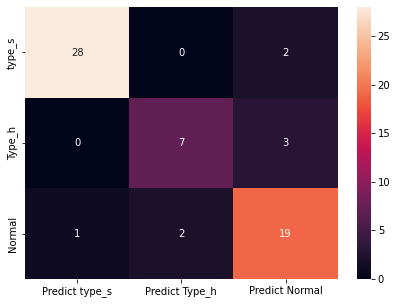

In [68]:
print("Confusion Matrix")
cm_1=metrics.confusion_matrix(y_test, y_predict2, labels=["type_s", "Type_h","Normal"])

df_cm1 = pd.DataFrame(cm_1, index = [i for i in ["type_s", "Type_h","Normal"]],
                  columns = [i for i in ["Predict type_s","Predict Type_h", "Predict Normal"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True);

*Evaluation metrics Score comparision of SVM Base model vs Final model as below*

    Accuracy Score :  0.82 -  0.87  : +5% improvement

    Recall Score   : (0.76,0.58 & 0.97) - (0.79, 0.78 & 0.97)  : +(3%, 20% & 0%) improvement

    Precision Score: (0.73, 0.70 & 0.93) - (0.86, 0.70 & 0.93) : +(13%, 0% & 0%) improvement

    roc_auc Score  : 0.95 -  0.96 : +1% improvement

    F1-Score       : (0.74, 0.64 & 0.95) - (0.83, 0.74 & 0.95): +(9%, 10% & 0%) improvement

    
 **With above comparision we found that overall evaluation metric scores are improved from base model.** 

In [69]:
#Lets find the best hyperparameters to improve the model performance

from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [70]:
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)

In [71]:
#Create new KNN object
knn_3 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_3, hyperparameters, cv=10)

In [75]:
#Fit the model
best_model = clf.fit(XScaled,Y)

In [76]:
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 15


In [72]:
# Lets apply the best hypermeter (Best leaf_size) into our model.
knn_4 = KNeighborsClassifier(leaf_size=1, weights="distance")

knn_4.fit(X_train, y_train)

# predict the response
y_predict4 = knn_4.predict(X_test)

print("Accuracy score is", knn_4.score(X_test,y_test))
print ('Classification Report : ')
print (classification_report(y_predict4, y_test))

Accuracy score is 0.8548387096774194
Classification Report : 
              precision    recall  f1-score   support

      Normal       0.77      0.81      0.79        21
      Type_h       0.80      0.67      0.73        12
      type_s       0.93      0.97      0.95        29

    accuracy                           0.85        62
   macro avg       0.84      0.81      0.82        62
weighted avg       0.85      0.85      0.85        62



In [73]:
# Lets apply the best hypermeter (p=1) into our model.
knn_5 = KNeighborsClassifier(p=1, weights="distance")

knn_5.fit(X_train, y_train)

# predict the response
y_predict5 = knn_5.predict(X_test)

print("Accuracy score is", knn_5.score(X_test,y_test))
print ('Classification Report : ')
print (classification_report(y_predict5, y_test))

Accuracy score is 0.8225806451612904
Classification Report : 
              precision    recall  f1-score   support

      Normal       0.82      0.78      0.80        23
      Type_h       0.70      0.64      0.67        11
      type_s       0.87      0.93      0.90        28

    accuracy                           0.82        62
   macro avg       0.79      0.78      0.79        62
weighted avg       0.82      0.82      0.82        62



In [74]:
# Lets apply the best hypermeter (Best n_neighbors) into our model.
knn_6 = KNeighborsClassifier(n_neighbors=15, weights="distance")

knn_6.fit(X_train, y_train)

# predict the response
y_predict6 = knn_6.predict(X_test)

print("Accuracy score is", knn_6.score(X_test,y_test))
print ('Classification Report : ')
print (classification_report(y_predict6, y_test))

Accuracy score is 0.8548387096774194
Classification Report : 
              precision    recall  f1-score   support

      Normal       0.86      0.79      0.83        24
      Type_h       0.70      0.70      0.70        10
      type_s       0.90      0.96      0.93        28

    accuracy                           0.85        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.85      0.85      0.85        62



#### C. Clearly state which parameters contributed most to improve model performance.

*In our KNN Classifier models we have performed with hyperparameters (leaf_size , n_neighbors & p). By comparing F1-score among them we found that reducing misclassification error with optimal selection of n_neighbors(k = 9) is contributed to improve the model performance which gives "Accuracy score": 0.87 & "F1-score":(Normal: 0.86 , Type_h: 0.74 & type_s: 0.95).*

## Part - B

**• DOMAIN:** Banking, Marketing

**• CONTEXT:** A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

**• DATA DICTIONARY:**
1. Team: Team’s name
2. ID: Customer ID
3. Age: Customer’s approximate age.
4. CustomerSince: Customer of the bank since. [unit is masked]
5. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
6. ZipCode: Customer’s zip code.
7. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
8. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
9. Level: A level associated to the customer which is masked by the bank as an IP.
10. Mortgage: Customer’s mortgage. [unit is masked]
11. Security: Customer’s security asset with the bank. [unit is masked]
12. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
13. InternetBanking: if the customer uses internet banking.
14. CreditCard: if the customer uses bank’s credit card.
15. LoanOnCard: if the customer has a loan on credit card.

**• PROJECT OBJECTIVE:** Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

### • STEPS AND TASK:

### 1. Data Understanding and Preparation:

#### A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. 

In [75]:
#Import the datasets
data1 = pd.read_csv("Data1.csv")
data2 = pd.read_csv("Data2.csv")

In [76]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [77]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


#### B. Print shape and Column Names and DataTypes of both the Dataframes.

In [78]:
print(data1.shape)
print(data1.columns)

(5000, 8)
Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')


In [79]:
print(data2.shape)
print(data2.columns)

(5000, 7)
Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


#### C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [80]:
Data = pd.merge(data1, data2, on="ID" ) # Merge the datasets on "ID".

In [81]:
Data.shape

(5000, 14)

#### D. Change Datatype of below features to ‘Object’
**‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore.**

In [82]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [83]:
Data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [84]:
# Lets change the data types of the features "object" to "int".
Data.loc[:,["CreditCard", "InternetBanking", "FixedDepositAccount", "Security", "Level", "HiddenScore"]] = Data.loc[:,["CreditCard", "InternetBanking", "FixedDepositAccount", "Security", "Level", "HiddenScore"]].astype("object")

In [85]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


### 2. Data Exploration and Analysis: 

#### A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

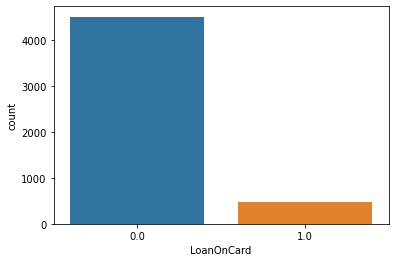

In [86]:
sns.countplot(Data["LoanOnCard"]);

#### B. Check the percentage of missing values and impute if required. 

In [87]:
Data.isnull().any() # Lets find any null values in the dataset.

ID                     False
Age                    False
CustomerSince          False
HighestSpend           False
ZipCode                False
HiddenScore            False
MonthlyAverageSpend    False
Level                  False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard              True
dtype: bool

In [88]:
A = Data["LoanOnCard"].isna().sum() # Count the null values.
A

20

In [89]:
B = Data["LoanOnCard"].count() # Count the non-null values.
B

4980

In [90]:
null_percent= (A/B)*100 # Percentage of null values
null_percent

0.4016064257028112

There is 0.4% null values in the "LoanOnCard" column

In [91]:
# Lets replace the null value to Median value.
Data["LoanOnCard"] = Data["LoanOnCard"].fillna(Data["LoanOnCard"].median())

In [92]:
Data.isnull().any() # Lets check for null value

ID                     False
Age                    False
CustomerSince          False
HighestSpend           False
ZipCode                False
HiddenScore            False
MonthlyAverageSpend    False
Level                  False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard             False
dtype: bool

#### C. Check for unexpected values in each categorical variable and impute with best suitable value.

In [93]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


*Data type of the all features should be in (int/float). Obeject data type features needs to be preprocessed.*

In [94]:
Data["HiddenScore"] = Data["HiddenScore"].astype("int64")
Data["Level"] = Data["Level"].astype("int64")
Data["Security"] = Data["Security"].astype("int64")
Data["FixedDepositAccount"] = Data["FixedDepositAccount"].astype("int64")
Data["InternetBanking"] = Data["InternetBanking"].astype("int64")
Data["CreditCard"] = Data["CreditCard"].astype("int64")
Data["LoanOnCard"] = Data["LoanOnCard"].astype("int64")

In [95]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


### 3. Data Preparation and model building: 

#### A. Split data into X and Y. 

In [96]:
Data.drop("ID",axis=1,inplace=True)
Data.drop("ZipCode",axis=1,inplace=True)
Data.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


In [97]:
X1 = Data.iloc[:,:-1]
Y1 = Data.iloc[:,-1]

In [98]:
X1.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [99]:
Y1.head()

0    0
1    0
2    0
3    0
4    0
Name: LoanOnCard, dtype: int64

In [100]:
# Lets transform the data into standard scale format.
XScaled1 = pd.DataFrame(StandardScaler().fit_transform(X1))
XScaled1.columns = X1.columns
XScaled1.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632


#### B. Split data into train and test. Keep 25% data reserved for testing. 

In [101]:
from sklearn.model_selection import train_test_split # Import the library 

In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(XScaled1,Y1,test_size=.25,random_state=42) 

In [103]:
Y_train.count()

3750

In [104]:
Y_test.count()

1250

#### C. Train a Supervised Learning Classification base model - Logistic Regression.

In [105]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
#predict on test
y_predict = model.predict(X_test)
y_predict_prob = model.predict_proba(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.202298  0.320223  2.318833  0.770744  0.185131  1.301656  0.071481   

         7         8         9        10  intercept  
0 -0.28884  0.846036 -0.276964 -0.514201  -4.440588  


In [106]:
model_score = model.score(X_test, Y_test)
print(model_score)

0.9512


#### D. Print evaluation metrics for the model and clearly share insights.

In [107]:
from sklearn import metrics 

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [108]:
print ('Accuracy Score is',accuracy_score(Y_test, y_predict))
print ('Recall Score is',recall_score(Y_test, y_predict))
print ('Precision Score is',precision_score(Y_test, y_predict))
print ('roc_auc Score is',roc_auc_score(Y_test, y_predict,multi_class='ovr'))

Accuracy Score is 0.9512
Recall Score is 0.6567164179104478
Precision Score is 0.8543689320388349
roc_auc Score is 0.8216377788476971


In [109]:
print ('Classification Report : ')
print (classification_report(y_predict, Y_test))

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1147
           1       0.66      0.85      0.74       103

    accuracy                           0.95      1250
   macro avg       0.82      0.91      0.86      1250
weighted avg       0.96      0.95      0.95      1250



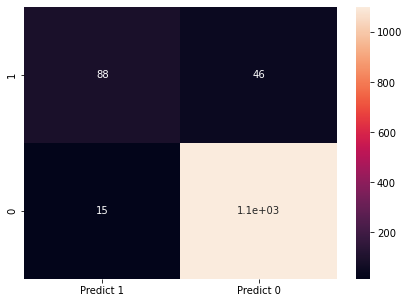

In [110]:
cm1=metrics.confusion_matrix(Y_test, y_predict, labels=[1, 0])

df_cm1 = pd.DataFrame(cm1, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True);

In [111]:
cm1

array([[  88,   46],
       [  15, 1101]], dtype=int64)

#### E. Balance the data using the right balancing technique.

i. Check distribution of the target variable

ii. Say output is class A : 20% and class B : 80%

iii. Here you need to balance the target variable as 50:50.

iv. Try appropriate method to achieve the same.

In [112]:
Data.groupby(by=["LoanOnCard"])["LoanOnCard"].count()

LoanOnCard
0    4520
1     480
Name: LoanOnCard, dtype: int64

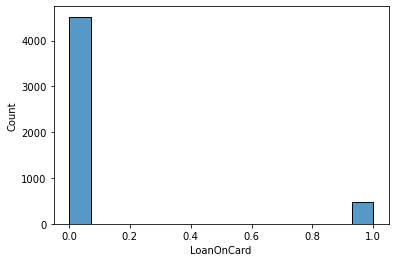

In [113]:
sns.histplot(Data["LoanOnCard"]);

In [114]:
DataX = Data[(Data.LoanOnCard==1)]
DataX.shape

(480, 12)

In [115]:
DataY = Data[(Data.LoanOnCard==0)]
DataY.shape

(4520, 12)

In [116]:
# To balance the data we have to do upsampling the DataX.

from sklearn.utils import resample

DataX1 = resample(DataX,replace=True,n_samples=len(DataY),random_state=42)

print(DataX1.shape)

(4520, 12)


In [117]:
# Concatnating the datasets.
df1 = [DataX1,DataY]
df_new = pd.concat(df1,ignore_index = True)

In [118]:
df_new.shape

(9040, 12)

In [119]:
#Lets split the independent & taget features.
X2 = df_new.iloc[:,:-1]
Y2 = df_new.iloc[:,-1]

In [120]:
X2.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,41,16,175,2,1.10,3,0,0,0,1,0
1,39,14,141,4,6.30,1,0,1,1,1,1
2,61,37,172,4,4.25,1,0,0,1,1,1
3,35,11,160,4,5.70,3,0,1,0,0,0
4,30,5,125,4,0.50,3,0,0,1,1,0


In [121]:
Y2.head()

0    1
1    1
2    1
3    1
4    1
Name: LoanOnCard, dtype: int64

In [122]:
# Lets transform the data into standard scale format.
XScaled2 = pd.DataFrame(StandardScaler().fit_transform(X2))
XScaled2.columns = X2.columns
XScaled2.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,-0.367926,-0.347470,1.287760,-0.437499,-0.806890,1.173276,-0.570092,-0.357020,-0.444599,0.809739,-0.656378
1,-0.541836,-0.521349,0.655721,1.316767,1.637169,-1.260784,-0.570092,2.800964,2.249218,0.809739,1.523512
2,1.371184,1.478263,1.231991,1.316767,0.673646,-1.260784,-0.570092,-0.357020,2.249218,0.809739,1.523512
3,-0.889658,-0.782168,1.008919,1.316767,1.355162,1.173276,-0.570092,2.800964,-0.444599,-1.234965,-0.656378
4,-1.324436,-1.303806,0.358291,1.316767,-1.088897,1.173276,-0.570092,-0.357020,2.249218,0.809739,-0.656378


#### F. Again train the same previous model on balanced data. 

In [123]:
# Training & Testing & Spliting the dataset
X2_train,X2_test,Y2_train,Y2_test = train_test_split(XScaled2,Y2,test_size=0.25,random_state=42)

In [124]:
Y2_train.count()

6780

In [125]:
Y2_test.count()

2260

In [126]:
# Fit the model on train
model2 = LogisticRegression(solver="liblinear")
model2.fit(X2_train, Y2_train)
#predict on test
y2_predict = model2.predict(X2_test)
y2_predict_prob = model2.predict_proba(X2_test)

coef2_df = pd.DataFrame(model2.coef_)
coef2_df['intercept'] = model2.intercept_
print(coef2_df)


          0         1         2        3         4        5         6  \
0 -0.625043  0.574955  2.772097  0.66252  0.512948  1.08881  0.025478   

          7         8         9        10  intercept  
0 -0.382412  1.368664 -0.312362 -0.375347   0.124421  


In [127]:
#Let find the model score.
model_score2 = model2.score(X2_test, Y2_test)
print(model_score2)

0.8946902654867257


#### G. Print evaluation metrics and clearly share differences observed. 

In [128]:
print ('Accuracy Score is',accuracy_score(Y2_test, y2_predict))
print ('Recall Score is',recall_score(Y2_test, y2_predict))
print ('Precision Score is',precision_score(Y2_test, y2_predict))
print ('roc_auc Score is',roc_auc_score(Y2_test, y2_predict))

Accuracy Score is 0.8946902654867257
Recall Score is 0.8896734333627537
Precision Score is 0.8991971454058876
roc_auc Score is 0.8947036199644293


In [129]:
print ('Classification Report : ')
print (classification_report(y2_predict, Y2_test))

Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1139
           1       0.89      0.90      0.89      1121

    accuracy                           0.89      2260
   macro avg       0.89      0.89      0.89      2260
weighted avg       0.89      0.89      0.89      2260



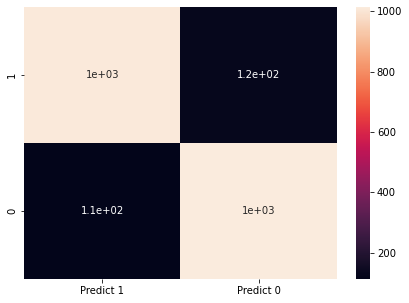

In [130]:
cm2=metrics.confusion_matrix(Y2_test, y2_predict, labels=[1, 0])

df_cm2 = pd.DataFrame(cm2, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True);

In [131]:
cm2

array([[1008,  125],
       [ 113, 1014]], dtype=int64)

*Evaluation metrics Score comparision of Imbalanced vs Balanced dataset*

    Accuracy Score : 0.95 -  0.89

    Recall Score   : 0.66 -  0.89

    Precision Score: 0.85 -  0.90

    roc_auc Score  : 0.82 -  0.89

    F1-Score(0 & 1): (0.97 & 0.74) - (0.89 & 0.89)
    
 *With above comparision finally we found that evaluation metric scores are balanced for both classification with balanced dataset*

### 4. Performance Improvement: 

#### A. Train a base model each for SVM, KNN.

In [132]:
#import required packages
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC

In [133]:
#Train a model for KNN Classifier model
knn_model1 = KNeighborsClassifier()
knn_model1.fit(X2_train, Y2_train)

knn_predict1 = knn_model1.predict(X2_test)

# check the accuracy on the training & testing sets
print("The KNN training data score is %f" % (knn_model1.score(X2_train, Y2_train)))
print("The KNN testing data score is %f" % (knn_model1.score(X2_test, Y2_test)))

# check the performance of the model
print ('Accuracy Score is',accuracy_score(Y2_test, knn_predict1))
print ('roc_auc Score is',roc_auc_score(Y2_test, knn_predict1))
print ('Confusion Matrix : ')
print(metrics.confusion_matrix(Y2_test, knn_predict1, labels=[1, 0]))
print ('Classification Report : ')
print (classification_report(knn_predict1, Y2_test))

The KNN training data score is 0.984366
The KNN testing data score is 0.972124
Accuracy Score is 0.9721238938053097
roc_auc Score is 0.9720543883542134
Confusion Matrix : 
[[1131    2]
 [  61 1066]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1068
           1       1.00      0.95      0.97      1192

    accuracy                           0.97      2260
   macro avg       0.97      0.97      0.97      2260
weighted avg       0.97      0.97      0.97      2260



In [134]:
#Train a model for Support Vector Classifier model
SVC_model1 = SVC()
SVC_model1.fit(X2_train, Y2_train)

SVC_predict1 = SVC_model1.predict(X2_test)

# check the accuracy on the training set
print("The SVC training data score is %f" % (SVC_model1.score(X2_train, Y2_train)))
print("The SVC testing data score is %f" % (SVC_model1.score(X2_test, Y2_test)))

# check the performance of the model
print ('Accuracy Score is',accuracy_score(Y2_test, SVC_predict1))
print ('roc_auc Score is',roc_auc_score(Y2_test, SVC_predict1))
print ('Confusion Matrix : ')
print(metrics.confusion_matrix(Y2_test, SVC_predict1, labels=[1, 0]))
print ('Classification Report : ')
print (classification_report(SVC_predict1, Y2_test))

The SVC training data score is 0.976254
The SVC testing data score is 0.966372
Accuracy Score is 0.9663716814159292
roc_auc Score is 0.9663643960212736
Confusion Matrix : 
[[1098   35]
 [  41 1086]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1121
           1       0.97      0.96      0.97      1139

    accuracy                           0.97      2260
   macro avg       0.97      0.97      0.97      2260
weighted avg       0.97      0.97      0.97      2260



#### B. Tune parameters for each of the models wherever required and finalize a model.

In [135]:
# creating odd list of K for KNN
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors=k,weights='distance')
    KNN.fit(X2_train, Y2_train)
    # predict the response
    Y2_predict = KNN.predict(X2_test)
    # evaluate accuracy
    scores = accuracy_score(Y2_test, Y2_predict)
    ac_scores.append(scores)

# changing to misclassification error
MSE1 = [1 - x for x in ac_scores]

# determining best k
optimal_k1 = neighbors[MSE1.index(min(MSE1))]
print("The optimal number of neighbors is %d" % optimal_k1)

The optimal number of neighbors is 1


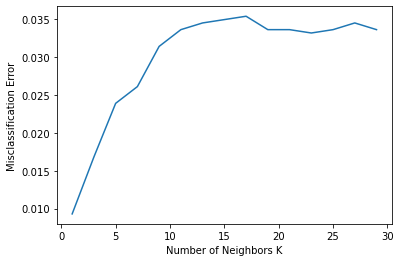

In [136]:
# plot misclassification error vs k
plt.plot(neighbors, MSE1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Above plot shows that optimal KNN is 1. For a very low value of k (k=1), the model overfits on the training data, which leads to a high error rate on the validation set. Hence we take second lowest value of k (k=3).

In [137]:
#Train a model for KNN Classifier model
knn_model2 = KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(X2_train, Y2_train)

knn_predict2 = knn_model1.predict(X2_test)

# check the accuracy on the training set
print("The KNN training data score is %f" % (knn_model2.score(X2_train, Y2_train)))
print("The KNN testing data score is %f" % (knn_model2.score(X2_test, Y2_test)))

# check the performance of the model
print ('Accuracy Score is',accuracy_score(Y2_test, knn_predict2))
print ('roc_auc Score is',roc_auc_score(Y2_test, knn_predict2))

print ('Confusion Matrix : ')
print(metrics.confusion_matrix(Y2_test, knn_predict2, labels=[1, 0]))

print ('Classification Report : ')
print (classification_report(knn_predict2, Y2_test))

The KNN training data score is 0.993068
The KNN testing data score is 0.980531
Accuracy Score is 0.9721238938053097
roc_auc Score is 0.9720543883542134
Confusion Matrix : 
[[1131    2]
 [  61 1066]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1068
           1       1.00      0.95      0.97      1192

    accuracy                           0.97      2260
   macro avg       0.97      0.97      0.97      2260
weighted avg       0.97      0.97      0.97      2260



Now lets find the best Hyperparameters for best performance for Support Vector Machine model.

In [138]:
#Lets import necessary package to Hyperparameter.

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats

In [139]:
# HYPERPARAMETERS FOR GRID SEARCH
parameters = {'C': [0.1,1,10,100,1000], 'gamma': [100,10,1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

# DEFINE MODEL AND PERFORMANCE MEASURE
mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

In [140]:
# Finding best Hyperparameter
rand_search = RandomizedSearchCV(mdl, parameters, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2022, scoring = auc) 

In [98]:
# Fitting our training set into RandomaizedSearchCV.
rand_search.fit(X2_train, Y2_train) 
rand_search.cv_results_

{'mean_fit_time': array([ 22.73593283,   5.20940789,  31.84974996,  15.74848127,
        865.07020617,  29.26179775,   9.648036  ,  16.42647521,
          4.90324084,  23.08757782,  30.83570147,   5.62719655,
          6.10343536,   6.15355047,  18.36445864,   7.47366532,
         31.2660052 ,  11.95567616,   4.28562419,   5.95802506]),
 'std_fit_time': array([ 3.58509   ,  1.47123389,  6.28140669,  0.13757461, 11.27937374,
         0.6674949 ,  0.23604819,  0.32223873,  0.15041711,  0.58886979,
         5.99694944,  0.32544029,  0.06285302,  0.06163365,  2.618417  ,
         0.16094425,  0.10433376,  0.13156645,  0.10284832,  0.45839802]),
 'mean_score_time': array([0.12244956, 0.40027992, 0.12625122, 1.27259143, 0.1782132 ,
        3.97869086, 0.60017927, 2.72083847, 0.68048461, 4.4670492 ,
        0.11761204, 0.41291857, 0.30666804, 0.44169688, 0.1228977 ,
        0.42708286, 4.04886365, 2.19753726, 0.30404083, 0.40803115]),
 'std_score_time': array([0.00389024, 0.10932641, 0.010085

In [99]:
print('Best Score: %s' % rand_search.best_score_)
print('Best Hyperparameters: %s' % rand_search.best_params_)

Best Score: 0.9930617065249484
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 100, 'C': 1000}


In [141]:
#Train our best model of Support Vector Classifier.
SVC_model2 = svc(kernel='rbf',gamma=100, C=1000, random_state=1)
SVC_model2.fit(X2_train, Y2_train)

SVC_predict2 = SVC_model2.predict(X2_test)

# check the accuracy on the training set
print("The SVC training data score is %f" % (SVC_model2.score(X2_train, Y2_train)))
print("The SVC testing data score is %f" % (SVC_model2.score(X2_test, Y2_test)))

The SVC training data score is 1.000000
The SVC testing data score is 1.000000


With above Parameters we are getting 100% accuracy in both training & testing data.Our model overfitted. Hence we have to fine tune our model to get better performance.

In [142]:
#Train our best model of Support Vector Classifier.
SVC_model2 = svc(kernel='rbf',gamma=1, random_state=1) # Optimal parameter of "gamma" is 1.
SVC_model2.fit(X2_train, Y2_train)

SVC_predict2 = SVC_model2.predict(X2_test)

# check the accuracy on the training set
print("The SVC training data score is %f" % (SVC_model2.score(X2_train, Y2_train)))
print("The SVC testing data score is %f" % (SVC_model2.score(X2_test, Y2_test)))

The SVC training data score is 0.998083
The SVC testing data score is 0.993363


#### C. Print evaluation metrics for final model.

Comparing of KNN & SVM models we found SVC model has high model score.Hence "SVC_model2" is our final model.

Accuracy Score is 0.9933628318584071
roc_auc Score is 0.9933475136092275
Confusion Matrix : 
[[1132    1]
 [  14 1113]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1114
           1       1.00      0.99      0.99      1146

    accuracy                           0.99      2260
   macro avg       0.99      0.99      0.99      2260
weighted avg       0.99      0.99      0.99      2260

Confusion Matrix : 


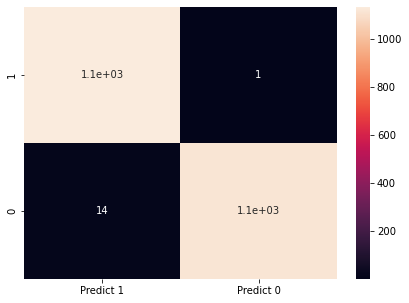

In [143]:
# check the performance of the our final SVC model.

print ('Accuracy Score is',accuracy_score(Y2_test, SVC_predict2))
print ('roc_auc Score is',roc_auc_score(Y2_test, SVC_predict2))

print ('Confusion Matrix : ')
print(metrics.confusion_matrix(Y2_test, SVC_predict2, labels=[1, 0]))

print ('Classification Report : ')
print (classification_report(SVC_predict2, Y2_test))

cm3=metrics.confusion_matrix(Y2_test, SVC_predict2, labels=[1, 0])

print ('Confusion Matrix : ')
df_cm3 = pd.DataFrame(cm3, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm3, annot=True);

#### D. Share improvement achieved from base model to final model

*Evaluation metrics Score comparision of SVM Base model vs Final model as below*

    Accuracy Score : 0.97 -  0.99 = 2% Improved

    Recall Score   : (0.96 & 0.97) - ( 1.0 & 0.99) = (4% & 2%) Improved

    Precision Score: (0.97 & 0.96) - (0.99 & 1.0) = (2% & 4%) Improved

    roc_auc Score  : 0.97 -  0.99 = 2% Improved

    F1-Score(0 & 1): (0.97 & 0.97) - (0.99 & 0.99) = 2% Improved
    
    Misclassification data(FP+FN) : 76 - 15 = 80% data misclassification reduced
    
 **With above comparision we found that overall evaluation metric scores are improved average 3% from base model.** 